In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import *
import seaborn as sb

In [59]:
sb.set()
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [60]:
print(pd.DataFrame(housing.columns).T)

           0         1                   2            3               4  \
0  longitude  latitude  housing_median_age  total_rooms  total_bedrooms   

            5           6              7                   8                9  
0  population  households  median_income  median_house_value  ocean_proximity  


In [61]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


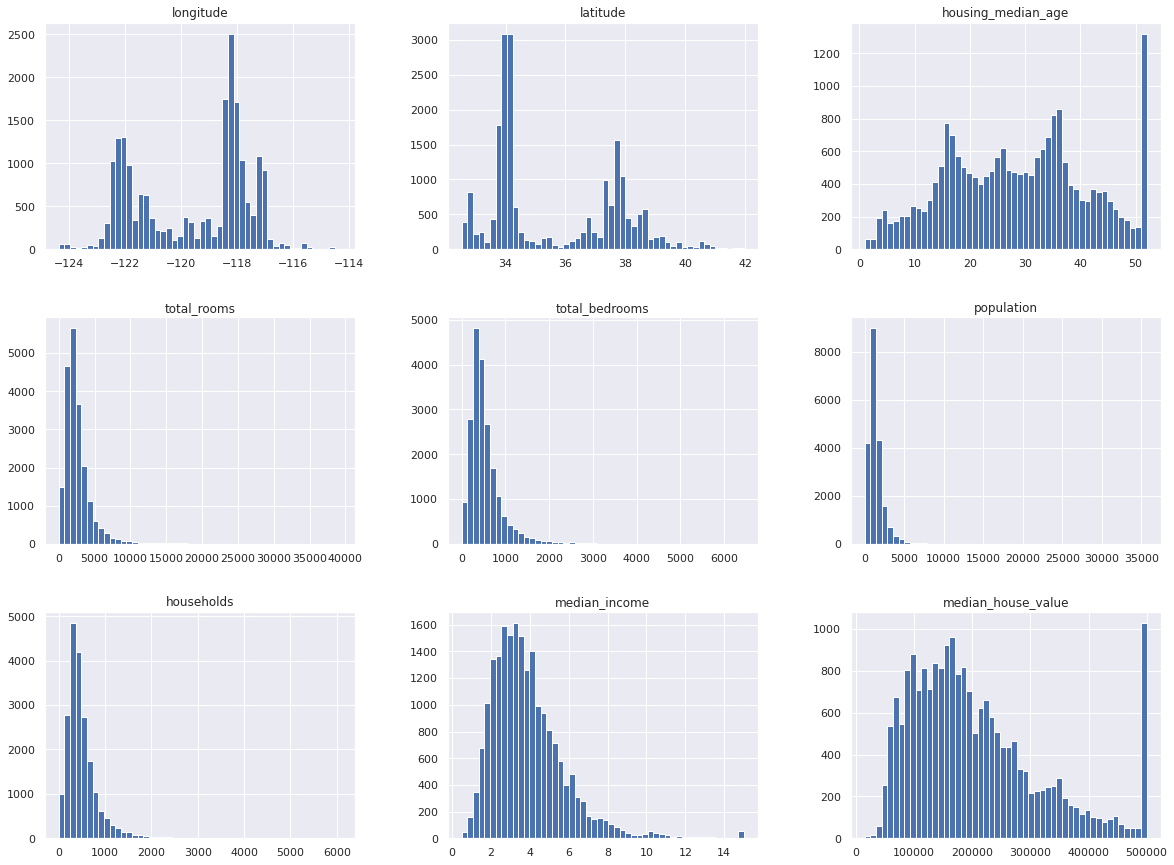

In [62]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [63]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [64]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [65]:
def split_train_test(data=housing, test_ratio=0.2):
    shuffled_indices = np.random.permutation(len(data))
    set_size = int(test_ratio * len(data))
    train_set_indices = shuffled_indices[set_size:]
    test_set_indices = shuffled_indices[:set_size]
    return data.iloc[train_set_indices], data.iloc[test_set_indices]

In [66]:
split_train_test(housing, 0.2)

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 407      -122.27     37.89                52.0       3046.0           373.0   
 19165    -122.68     38.40                32.0       2826.0           627.0   
 8624     -118.38     33.88                34.0       1830.0           315.0   
 17878    -122.01     37.40                14.0       4841.0          1130.0   
 14965    -116.99     32.74                18.0       3341.0           611.0   
 ...          ...       ...                 ...          ...             ...   
 9553     -120.64     37.38                21.0       3157.0           637.0   
 15668    -122.44     37.80                52.0       3257.0           735.0   
 6651     -118.14     34.15                41.0       1256.0           407.0   
 11936    -117.40     33.94                42.0        943.0           171.0   
 6655     -118.13     34.16                33.0       2682.0           716.0   
 
        population  households  median

In [67]:
train_set0, test_set0 = split_train_test(housing, 0.2)
print('test set:  ', len(test_set0))
print('train set: ', len(train_set0))
print('total set: ', len(housing))

test set:   4128
train set:  16512
total set:  20640


In [68]:
np.random.seed(5)
np.random.permutation(5)

array([4, 0, 1, 2, 3])

In [69]:
from sklearn import model_selection
train_set, test_set = model_selection.train_test_split(housing, test_size=0.2, random_state=42)


In [70]:
print('test set:  ', len(test_set))
print('train set: ', len(train_set))
print('total set: ', len(housing))

test set:   4128
train set:  16512
total set:  20640


In [71]:
print(housing['median_income'].max(),
      housing['median_income'].min(),
      housing['median_income'].mean(),
      housing['median_income'].var())

15.0001 0.4999 3.8706710029070246 3.609322559976529


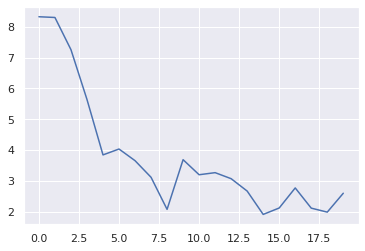

In [72]:
plt.plot(housing['median_income'].head(20))

In [73]:
housing['income category'] = np.ceil(housing['median_income'] / 1.5)
housing['income category'].where(housing['income category'] < 5, 5, inplace=True)

In [74]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
print(housing['income_cat'].head(10))
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
print(housing['income_cat'].head(10))


0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
5    3.0
6    3.0
7    3.0
8    2.0
9    3.0
Name: income_cat, dtype: float64
0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
5    3.0
6    3.0
7    3.0
8    2.0
9    3.0
Name: income_cat, dtype: float64


In [75]:
housing['income_cat'].mean()

3.006686046511628

In [76]:
housing['income category']

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income category, Length: 20640, dtype: float64

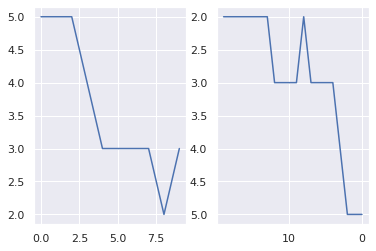

In [77]:
graph, (plot1, plot2) = plt.subplots(1, 2)
plot1.plot(housing['income_cat'].head(10))
plot2.plot(housing['income_cat'].head(20))
plot2.invert_xaxis()
plot2.invert_yaxis()

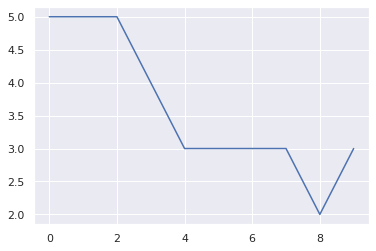

In [78]:
plt.plot(housing['income_cat'].head(10))


In [79]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]


In [80]:
housing = strat_train_set.copy()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

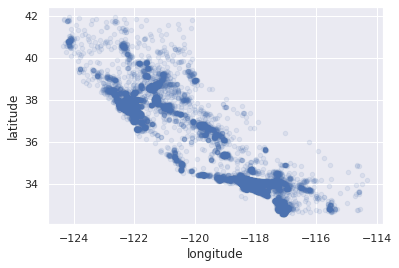

In [81]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

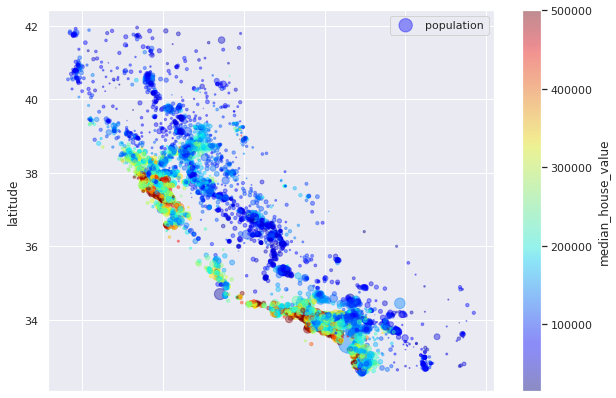

In [82]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

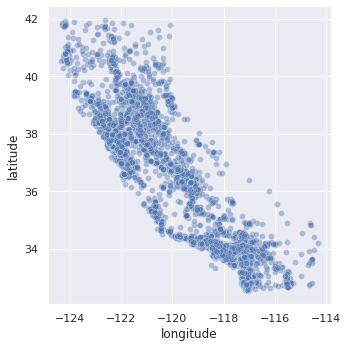

In [83]:
sb.relplot(kind='scatter', x='longitude', y='latitude', data=housing, alpha=0.4)

In [84]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=True)

latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
income category       0.642256
income_cat            0.642256
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [85]:
from pandas import *
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
pandas.tools.plotting

NameError: name 'pandas' is not defined

In [ ]:
housing_cat = housing['ocean_proximity']
housing_cat.unique()

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [ ]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [ ]:
print(housing_cat_encoded.shape)
housing_cat[:10]

(16512,)


12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [ ]:
housing_cat_encoded[:10]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot
# print(housing_cat_1hot)

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_encoded.reshape(-1,1)

array([[0],
       [1],
       [0],
       ...,
       [2],
       [2],
       [0]])

In [105]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
feature_scaled_array = list()
array = np.random.randint(10, 50, 10)
print(array)
min = array.min()
max = array.max()
print(f"min = {min}\nmax = {max}\n")
for i in array:
    feature_scaled_array.append(round((i - min)/(max - min), 2))


print(f"feature scaled array from scratch:\n{feature_scaled_array}")

# using sklearn
# if the array is 1D, we have tp reshape to (-1, 1) 
scaler = MinMaxScaler()
print("\nfeature scaled array using sklearn:")
formatter = '{:.2f}'.format


np.set_printoptions(formatter={'float_kind':formatter})
print(((scaler.fit_transform(array.reshape(-1, 1))).reshape(1, -1)))

[43 45 39 11 28 30 10 44 24 40]
min = 10
max = 45

feature scaled array from scratch:
[0.94, 1.0, 0.83, 0.03, 0.51, 0.57, 0.0, 0.97, 0.4, 0.86]

feature scaled array using sklearn:
[[0.94 1.00 0.83 0.03 0.51 0.57 0.00 0.97 0.40 0.86]]
